In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

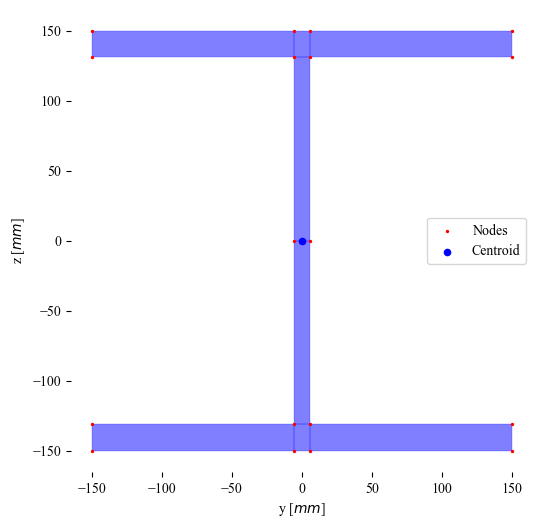

In [2]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=100)
beam.plot()


In [3]:
#struc_3 = structure.Cantilever(beam   = beam, 
#						length = 1000, 
#						number_of_sections_per_elemnt = 3)
struc_4 = structure.Cantilever(beam   = beam, 
						length = 1000, 
						number_of_sections_per_elemnt = 4)
#struc_6 = structure.Cantilever(beam   = beam, 
#						length = 1000, 
#						number_of_sections_per_elemnt = 6)
#struc_10 = structure.Cantilever(beam   = beam, 
#						length = 1000, 
#						number_of_sections_per_elemnt = 10)

In [4]:
#non_linear_solver_3 = solver.Nonlinear(struc_3, 
#									 constraint="Load", 
#									 NR_tolerance=1e-6, 
#									 NR_max_iter=10, 
#									 section_tolerance=1e-6, 
#									 section_max_iter=100)
non_linear_solver_4 = solver.Nonlinear(struc_4, 
									 constraint="Displacement", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)
#non_linear_solver_6 = solver.Nonlinear(struc_6, 
#									 constraint="Load", 
#									 NR_tolerance=1e-6, 
#									 NR_max_iter=10, 
#									 section_tolerance=1e-6, 
#									 section_max_iter=100)
#non_linear_solver_10 = solver.Nonlinear(struc_10, 
#									 constraint="Load", 
#									 NR_tolerance=1e-6, 
#									 NR_max_iter=10, 
#									 section_tolerance=1e-6, 
#									 section_max_iter=100)

In [5]:
increments = [2.6, 0.5, 0.5, 0.5]
print(increments)

#u_history_3 , lambda_history_3  = non_linear_solver_3.solve(increments)
u_history_4 , lambda_history_4  = non_linear_solver_4.solve(increments)
#u_history_6 , lambda_history_6  = non_linear_solver_6.solve(increments)
#u_history_10, lambda_history_10 = non_linear_solver_10.solve(increments)

[2.6, 0.5, 0.5, 0.5]


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 4
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  8.470329737240795e-22
NR Converged!
----------------------------------------------
Load step 2 of 4
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
      Residuals Norm  27811134.47104009
      NR Iteration  1
         Beam Element  1
            Element iteration  0
      Residuals Norm  2.98025497605034e-08
NR Converged!
----------------------------------------------
Load step 3 of 4
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
      Residuals Norm  570903.1969243855
      NR Iteration  1
         Beam Element  1
            Element iteration  0
      Residuals Norm  4.190951585769653e-09
NR Converged!
----------------------------------------------


(0.0, 600000.0)

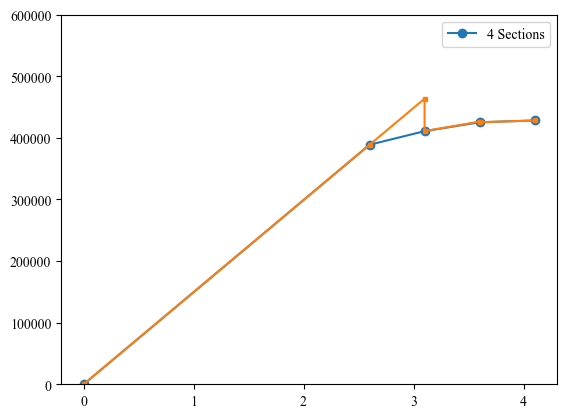

In [6]:
llambda = [0,388866, 463648,410917,426461,425330,428234]
U = [0,2.6,3.1,3.1,3.6,3.6,4.1]
#plt.plot(u_history_3[:,6+2],  lambda_history_3,  label="3 Sections",  marker="o")
plt.plot(-u_history_4[:,6+2],  -lambda_history_4,  label="4 Sections",  marker="o")
plt.plot(U, llambda, marker="s", markersize=3)
#plt.plot(u_history_10[:,6+2], lambda_history_10, label="10 Sections", marker="o")
#plt.plot(u_history_6[:,6+2],  lambda_history_6,  label="6 Sections",  marker="o")
plt.legend()
plt.ylim(0,600000)